## Bootstrap Confidence Intervals

The **empirical bootstrap** is a technique popularized by Bradley Efron in 1979. It is easy to understand and implement, but is just recently gaining popularity, since it is not really feasible without modern computing power. The bootstrap allows us to substitute fast computation for theoretical math.

**Big Idea:** perform computations on the data itself to estimate the variation of statistics that are themselves computed from the same data. That is, the data is ‘pulling itself up by its own bootstrap.’ 

Since the bootstrap allows you to estimate the variance of the sampling distribution of these statistics, you can use this technique to construct confidence intervals.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

You have already seen how to create a t-interval to estimate the population mean. Now, you will use the bootstrap to estimate the population median.

You'll use the American Time Use Survey sleeping data again.

In [6]:
sleeping = pd.read_csv('../data/atus_sleeping.csv')

In [7]:
sleeping.head()

,participant_id,minutes_spent_sleeping,sex
0,20181211181182,270,Male
1,20180908180663,600,Male
2,20180706181412,355,Male
3,20181009181978,405,Male
4,20180503180964,270,Male


First, get a point estimate:

In [8]:
sleeping.minutes_spent_sleeping.median()

550.0

The point estimate is 550 minutes.

Now, the idea is to repeatedly resample with replacement from the observations.

In [14]:
point_estimate = np.median(sleeping.minutes_spent_sleeping)

#Number of Resamples
num_resamples = 10000

#Confidence Level
conf_level = 0.95

#Divide the remaining area in half. Half for the left and half for the right
margin = (1 - conf_level) / 2

values = sleeping.minutes_spent_sleeping.to_list()

resample_values = []

for i in range(num_resamples):
    #Resample with replacement
    resample = np.random.choice(values, len(values))
    
    #Compute the difference between the resample median and the point estimate and save the value into the resample_values list
    resample_values.append(np.median(resample) - point_estimate)

#Find the quantiles of our resample values
top_quantile = np.quantile(resample_values, q = 1 - margin)
bottom_quantile = np.quantile(resample_values, q = margin)

print('lower bound: ', point_estimate - top_quantile)
print('upper bound: ', point_estimate - bottom_quantile)

lower bound:  502.5
upper bound:  615.0


You can also look at the distribution of resample values, if you want to get an idea of the variance in the sample statistics.

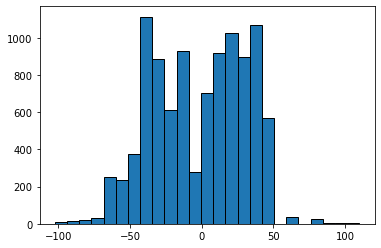

In [15]:
plt.hist(resample_values, edgecolor = 'black', bins = 25);

Rather than have to rewrite or copy/paste the above code every time you want to do a bootstrap confidence interval, here is a function that can be used.

In [16]:
from nssstats.bootstrap import bootstrap_ci

To use this function, just pass in the values for which you want to perform bootstrap resampling along with the statistic you want to compute. 

In [17]:
bootstrap_ci(sleeping['minutes_spent_sleeping'], statistic = np.median)

(502.5, 615.0)